In [8]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

In [5]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

# Ici, j'utiliserai le PSNR de skimage directement

In [6]:
def median_denoise_color(image_noised, window_size=3):
    if image_noised.ndim != 3 or image_noised.shape[2] != 3:
        raise ValueError("L'image d'entrée doit être en couleur (3 canaux).")
    image_filtree = image_noised.copy()
    offset = window_size // 2
    for channel in range(3):  # Boucle sur les canaux R, G, B
        for i in range(offset, image_noised.shape[0] - offset):
            for j in range(offset, image_noised.shape[1] - offset):
                window = image_noised[i - offset:i + offset + 1, j - offset:j + offset + 1, channel]
                median_value = np.median(window)
                image_filtree[i, j, channel] = median_value
    return image_filtree

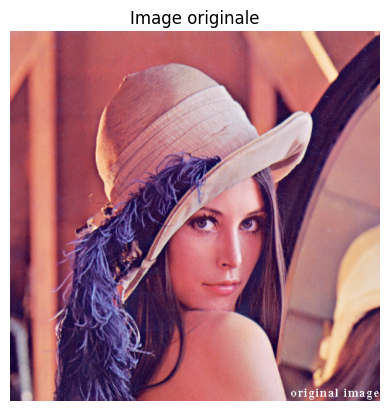

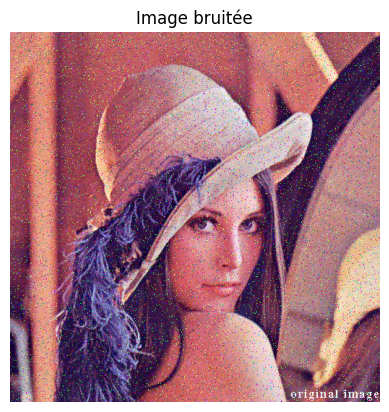

PSNR entre l'image originale et l'image bruitée :  18.15057722527677


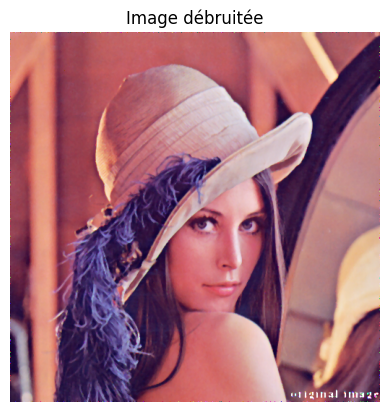

PSNR entre l'image originale et l'image débruitée :  29.898151121546547


In [17]:
image = import_image("lena.ppm")
display_image(image, "Image originale")
image_noised = ski.util.random_noise(image, mode='s&p', amount=0.05) * 255
image_noised = image_noised.astype(np.uint8)
display_image(image_noised, "Image bruitée")
print("PSNR entre l'image originale et l'image bruitée : ", psnr(image, image_noised))
image_filtree = median_denoise_color(image_noised)
display_image(image_filtree, "Image débruitée")
print("PSNR entre l'image originale et l'image débruitée : ", psnr(image, image_filtree))